Даны значения величины заработной платы заемщиков банка (zp) и значения их 

поведенческого кредитного скоринга (ks): 

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 

Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
print(zp, ks)

[ 35  45 190 200  40  70  54 150 120 110] [401 574 874 919 459 739 653 902 746 832]


In [3]:
X = zp
Y = ks
b1 = (np.mean(X * Y) - np.mean(X) * np.mean(Y)) / (np.mean(X ** 2) - np.mean(X) ** 2)
b1

2.620538882402765

In [4]:
b0 = np.mean(Y) - b1 * np.mean(X)
b0

444.1773573243596

Получается, что функция имеет вид :у = 444.1773573243596 + 2.620538882402765 * х

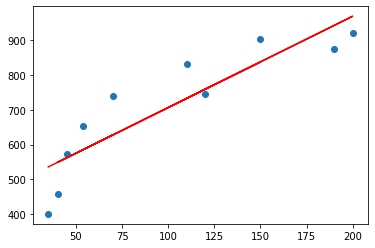

In [5]:
ox = X
oy = b0 + b1 * X

plt.scatter(X, Y)
plt.plot(ox, oy, color = 'red')

In [6]:
Z = b0 + b1 * X

print(f'real: {Y[:5]}')
print(f'pred: {Z[:5]}')

real: [401 574 874 919 459]
pred: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262]


Коэффициент детерминации:

In [7]:
R1 = Z.var() / Y.var()
R1

0.7876386635293678

In [8]:
np.corrcoef(X, Y) ** 2

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

Средняя ошибка аппроксимации:

In [11]:
def mean_approximation_error(y_real, y_pred):
  return np.abs((y_real - y_pred) / y_real).mean()

In [12]:
mean_approximation_error(Y, Z)

0.11469251843561709

Оценка значимости уравнения линейной регрессии:

Значение статистики:

In [13]:
k1 = 1
k2 = len(Y)

T1 = (R1 / (1 - R1)) * (k2 / k1)
T1

37.08955107458046

Пусть а = 0.05, тогда критерий фишера:

In [14]:
from scipy import stats

In [15]:
a = 0.05

F_crit = stats.f.ppf(1 - a, k1, k2)
F_crit

4.9646027437307145

Итак получается раз критерий статистики больше критерия Фишера, поэтому уравнение регрессии статистически значимо

Проверим значимость коэффициента наклона, а также построим для него доверительный интервал.

In [16]:
def standart_error_slope(x, y, z):
  n = x.shape[0]

  upper = ((y - z) ** 2).sum() / (n - 2)
  lower = ((y - x.mean()) ** 2).sum()

  return np.sqrt(upper / lower)

In [17]:
s_slope = standart_error_slope(X, Y, Z)
s_slope

0.0449251031802444

In [18]:
T = b1 / s_slope
T

58.331282443334146

Доверительный интервал:

In [19]:
t = 2.2281

(b1 - t * s_slope, b1 + t * s_slope)

(2.520441260006862, 2.7206365047986676)

Теперь через интерсепт:

In [20]:
def standart_error_intercept(x, y, z):
  return standart_error_slope(x, y ,z) * np.sqrt((x ** 2).mean())

In [21]:
s_intercept = standart_error_intercept(X, Y ,Z)
s_intercept

5.273028367348944

In [22]:
T = b0 / s_intercept
T

84.23572307608752

Доверительный интервал:

In [23]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(432.4285228190694, 455.9261918296498)